In [44]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
import warnings
    
# warnings -> to silence warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=5, suppress=True)

class_names = ["Canis", "Dysg. Equisimilis", "Dysg. Dysgalactiae"]

map_target = {
    "Streptococcus canis": 0,
    "Streptococcus dysgalactiae subsp. dysgalactiae": 1,
    "Streptococcus dysgalactiae subsp. equisimilis": 2
}

map_target_inv = {
    0: "Strept. canis",
    1: "Strept. dysg. dysgalactiae",
    2: "Strept. dysg. equisimilis"
    
}
map_target_antibiotici = {
    "S" : 1,
    "NS" : 0
}

In [45]:
def makeScore(y_test, y_pred):
    score = {}
    
    score['acc'] = accuracy_score(y_test, y_pred)
    score['b_acc'] = balanced_accuracy_score(y_test, y_pred)
    score['st'] = score['acc'].std()
    score['prec'] = precision_score(y_test, y_pred, average='weighted')
    score['rec'] = recall_score(y_test, y_pred, average='weighted')
    score['f1'] = f1_score(y_test, y_pred, average='weighted')
    
    return score

{'acc': 0.8766233766233766, 'b_acc': 0.9053350405463081, 'st': 0.0, 'prec': 0.9178360423643442, 'rec': 0.8766233766233766, 'f1': 0.8833640891401651}


,Cluster3,Cluster4,Cluster5,subspecies
V72,0,3,3,Strept. canis
V161,0,3,3,Strept. canis
V421,0,1,1,Strept. canis
V289,0,3,3,Strept. canis
V570,0,1,1,Strept. canis
...,...,...,...,...
V794,2,2,0,Strept. dysg. equisimilis
V735,2,2,0,Strept. dysg. equisimilis
V733,2,2,0,Strept. dysg. equisimilis
V706,2,2,0,Strept. dysg. equisimilis


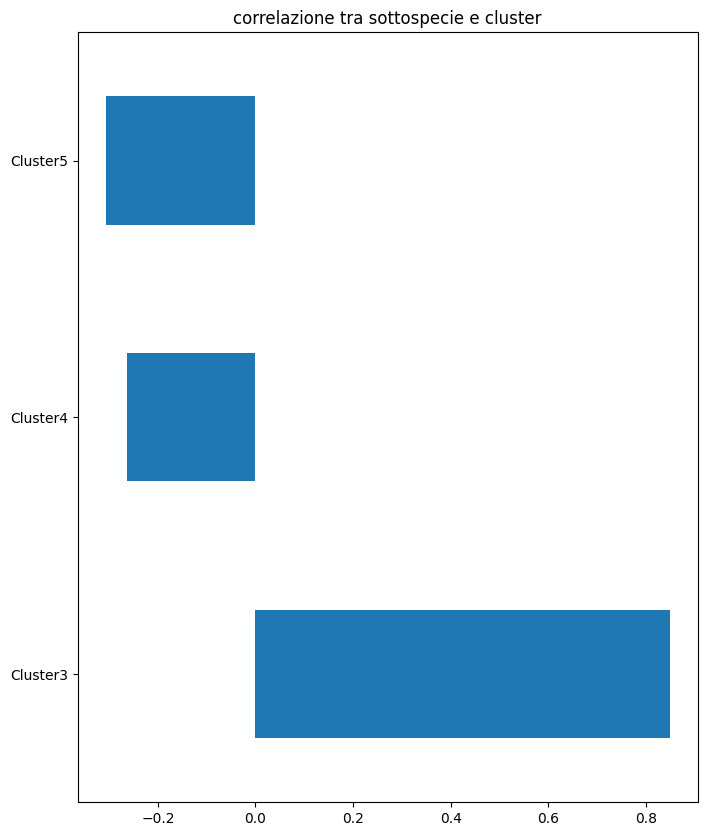

In [46]:
# Load the data
n = 46
df_target = pd.read_csv("../data/Dati_Matemaldomics_"+str(n)+"picchi.csv",
                    delimiter=';', index_col='ID Strain')
df_target['subspecies'] = df_target['Putative Subspecies'].map(map_target)
#display(df_target)
df_target = df_target['subspecies']
df3 = pd.read_excel("../data/clusters.xlsx",
                    sheet_name='Cluster3', index_col='IDCAMPIONE')
df4 = pd.read_excel("../data/clusters.xlsx",
                    sheet_name='Cluster4', index_col='IDCAMPIONE')
df5 = pd.read_excel("../data/clusters.xlsx",
                    sheet_name='Cluster5', index_col='IDCAMPIONE')
df = pd.concat([df3, df4, df5, df_target], axis=1)
df.dropna(inplace=True)
df.corr(method="spearman")['subspecies'][:-1].sort_values(ascending=False).plot(figsize=(8, 10), kind="barh", title='correlazione tra sottospecie e cluster')
score = makeScore(df['Cluster3'], df['subspecies'])
print(score)
df['subspecies'] = df['subspecies'].map(map_target_inv)
display(df)
#df.to_csv('Clusters.csv', index = True)